# Project Bimbingan Karir Data Science
Nama : Avissa Aurellia Amadea <br>
NIM  : A11.2020.12572

*   [1) Pengumpulan Data](#Pengumpulan-Data)
*   [2) Menelaah Data](#Menelaah-Data)

*   [3) Validasi Data](#Validasi-Data)
*   [4) Menentukan Object Data](#Menentukan-Object-Data)

*   [5) Membersihkan Data](#Membersihkan-Data)
*   [6) Konstruksi Data](#Konstruksi-Data)

*   [7) Modelling](#Modelling)
*   [8) Evaluasi](#Evaluasi)

*   [9) Streamlit](#Streamlit)
*   [10) Kesimpulan](#Kesimpulan)

## 1) Pengumpulan Data

Dataset dengan nama file "cleveland.data" bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease

## 2) Menelaah Data

In [336]:
import pandas as pd
import re
import numpy as np
import itertools

Load Data

In [337]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv("drive/My Drive/Colab Notebooks/cleveland.data")
# df.head()
dir = 'cleveland.data'

In [338]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [339]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur karena pada dataset ini nilai null disimbolkan dengan angka -9.0

In [341]:
# hapus kolom terakhir
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [342]:
# object ke float
df = df.astype(float)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

## 3) Validasi Data

untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [344]:
df.replace(-9.0, np.nan, inplace=True)

menghitung jumlah nilai null value

In [345]:
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [346]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

## 4) Menentukan Object Data

Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi target

In [348]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [349]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi target

In [350]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-350-edcc9cd19c95>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [351]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


menghitung jumlah fitur pada dataset

In [352]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

## 5) Membersihkan Data

pembersihan data dilakukan agar model yang dihasilkan lebih akurat <br>
menghitung jumlah null values yang ada di dalam dataset

In [353]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

karena masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [354]:
# memilih kolom dan menghapus nilai nullnya
meanCa = df_selected['ca'].dropna()
meanThal = df_selected['thal'].dropna()

In [355]:
# mengambil dan mengubah nilai dataset menjadi float
meanCa = meanCa.astype(float)
meanThal = meanThal.astype(float)

In [356]:
# mengubah dan membulatkan nilai mean
meanCa = round(meanCa.mean())
meanThal = round(meanThal.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [357]:
fill_values = {
    'ca': meanCa,
    'thal': meanThal
}
dfClean = df_selected.fillna(value=fill_values)

In [358]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [359]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

melakukan pengecekan terhadap duplikasi data

In [360]:
duplicated_rows = dfClean.duplicated()
dfClean[duplicated_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [361]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


menghitung jumlah nilai dari target

In [362]:
dfClean['target'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

mencari korelasi antar fitur

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

In [364]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


visualisasi korelasi antar fitur

<Axes: >

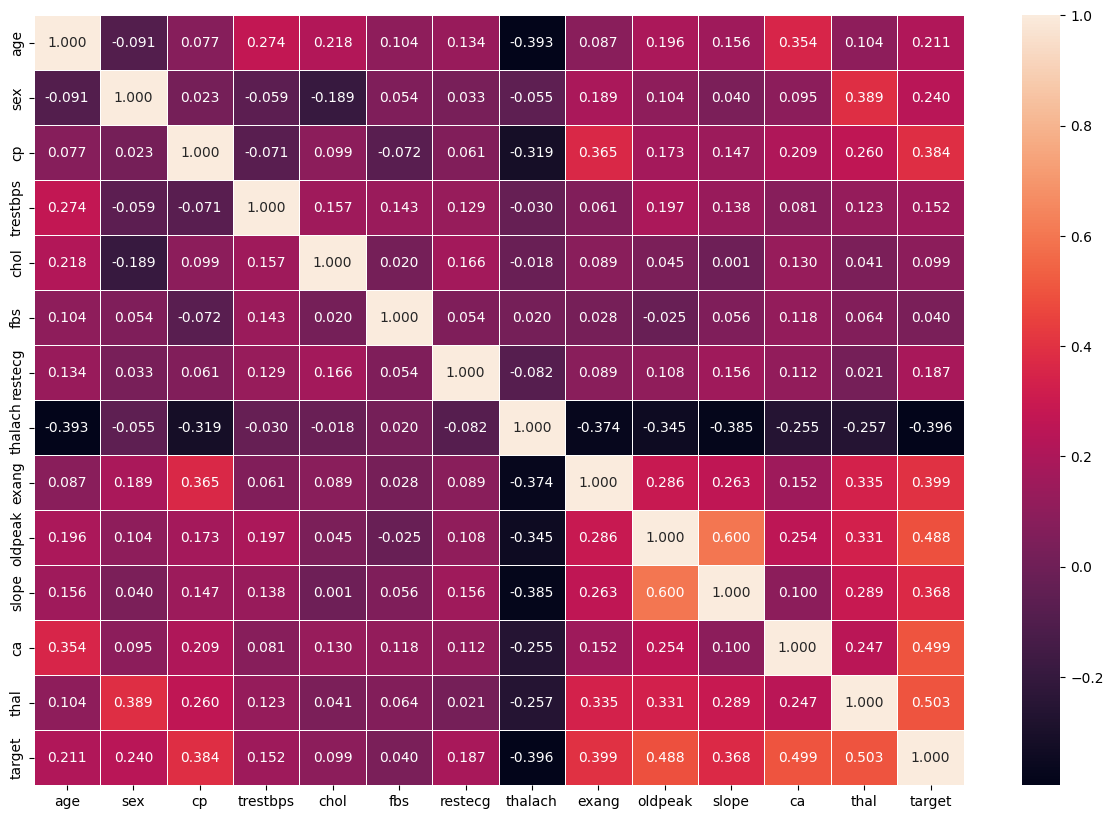

In [365]:
cor_mat = dfClean.corr()
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidth=0.5,fmt=".3f")

## 6) Konstruksi Data

Tujuan = untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [366]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [367]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


memisahkan antara fitur dan target lalu simpan ke dalam variabel baru

In [368]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

mengecek persebaran jumlah target

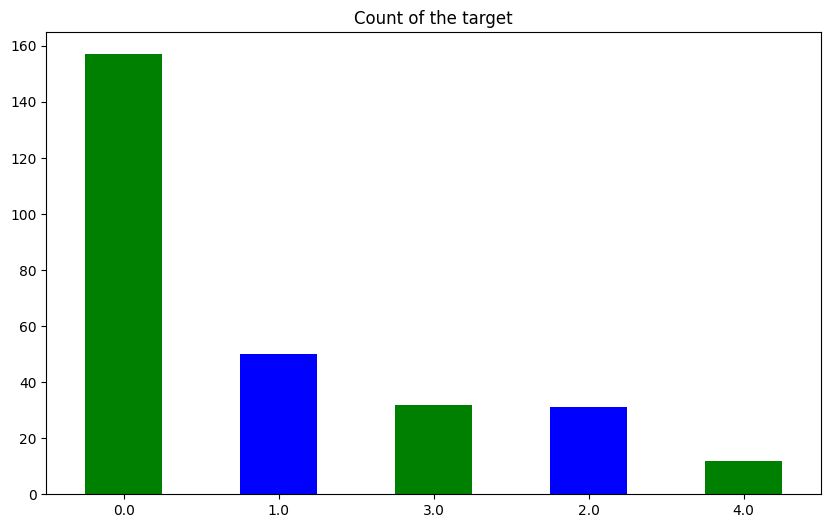

In [369]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Pada grafik di atas menunjukkan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu. <br>
Menyeimbangkan target ada 2 cara : **Oversampling** dan **Undersampling** <br>
Oversampling dilakukan jika jumlah dataset sedikit sedangkan Undersampling dilakukan jika jumlah data terlalu banyak.<br>
<br>
Untuk dataset ini menggunakan **Oversampling** karena jumlah data yang digunakan tidak banyak. Salah satu metode oversampling yang akan digunakan adalah **Random Overt Sampler**

In [370]:
from imblearn.over_sampling import RandomOverSampler

In [371]:
# oversampling RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros_resampled, y_ros_resampled = ros.fit_resample(X, y)

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

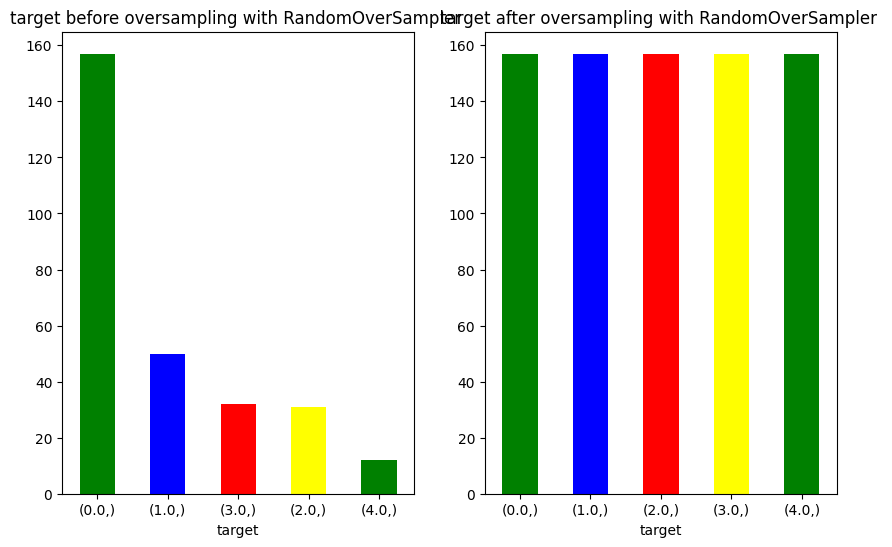

In [372]:
new_df1 = pd.DataFrame(data=y)


plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before oversampling with RandomOverSampler ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_ros_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after oversampling with RandomOverSampler ")
plt.xticks(rotation=0);

In [373]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Pada grafik terlihat target yang belum dan sudah diseimbangkan

In [374]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

In [375]:
# oversampling
new_df2 = pd.DataFrame(data=y_ros_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
dtype: int64

mengecek apakah perlu dilakukan normalisasi/standarisasi atau tidak pada dataset

In [376]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Pada deskripsi di atas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang dimiliki. <br>
Oleh karena itu, perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [377]:
from sklearn.preprocessing import MinMaxScaler

In [378]:
scaler = MinMaxScaler()

In [379]:
X_ros_resampled_normal = scaler.fit_transform(X_ros_resampled)

In [380]:
len(X_ros_resampled_normal)

785

In [381]:
dfcek1 = pd.DataFrame(X_ros_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.00000,785.000000,785.000000,785.000000,785.000000
mean,0.564782,0.777070,0.836093,0.382923,0.289570,0.150318,0.592994,0.538737,0.49172,0.252168,0.408917,0.348620,0.630255
std,0.183021,0.416477,0.279748,0.179340,0.119141,0.357611,0.489965,0.175129,0.50025,0.202374,0.291761,0.347560,0.469061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,1.000000,0.666667,0.245283,0.205479,0.000000,0.000000,0.412214,0.00000,0.096774,0.000000,0.000000,0.000000
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,1.000000,0.541985,0.00000,0.225806,0.500000,0.333333,1.000000
75%,0.687500,1.000000,1.000000,0.481132,0.369863,0.000000,1.000000,0.679389,1.00000,0.403226,0.500000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


setelah itu, membagi fitur dan target menjadi data train dan test

In [382]:
from sklearn.model_selection import train_test_split

In [383]:
# membagi fitur dan target menjadi data train dan test (data raw)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [384]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_ros_resampled, y_ros_resampled, test_size=0.2, random_state=42, stratify=y_ros_resampled)

In [385]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_ros_resampled_normal, y_ros_resampled, test_size=0.2, random_state=42, stratify=y_ros_resampled)

## 7) Modelling

Tahap membangun sebuah model<br>
<br>
Berikut sebuah fungsi untuk menampilkan hasil akurasi dan rata-rata dari recall, f1, dan precision score setiap model<br>
Fungsi ini akan dipanggil di setiap model --> Membuat fungsi ini bersifat opsional

In [386]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

In [387]:
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average='weighted')
  f1 = f1_score(Y_test,Y_pred,average='weighted')
  ps = precision_score(Y_test,Y_pred,average='weighted')

  metric_dict = {'accuracy' : round(acc,3),
                 'recall' : round(rcl,3),
                 'F1 score' : round(f1,3),
                 'precision score' : round(ps,3)
                 }

  return print(metric_dict)

## Data Raw

## Navie Bayes

In [388]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [389]:
# Build a Gaussian Classifier
nb_model = GaussianNB()

# Model training
nb_model.fit(X_train, y_train)

# Predict Output
y_pred_nb = nb_model.predict(X_test)

In [390]:
#Evaluate the Naive Bayes model
print("Naive Bayes Model :")
accuracy_nb =  round(accuracy_score(y_test,y_pred_nb),3)
print("Accuracy : ", accuracy_nb)
print("Classification Report : ")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model :
Accuracy :  0.509
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81        32
         1.0       0.29      0.40      0.33        10
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.51        57
   macro avg       0.22      0.24      0.23        57
weighted avg       0.52      0.51      0.51        57



In [391]:
evaluation(y_test, y_pred_nb)

{'accuracy': 0.509, 'recall': 0.509, 'F1 score': 0.511, 'precision score': 0.518}


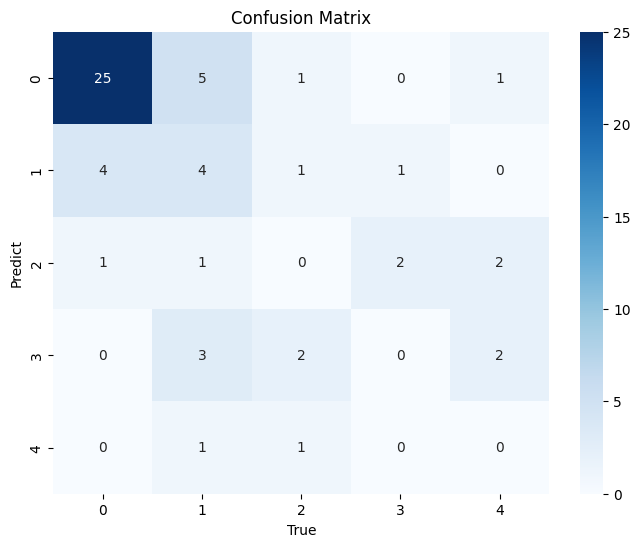

In [392]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Decision Tree

In [393]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [394]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt_model.predict(X_test)

In [395]:
#Evaluate the Decision Tree model
print("Decision Tree Model :")
accuracy_dt =  round(accuracy_score(y_test,y_pred_dt),3)
print("Accuracy : ", accuracy_dt)
print("Classification Report : ")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model :
Accuracy :  0.509
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        32
         1.0       0.33      0.20      0.25        10
         2.0       0.22      0.33      0.27         6
         3.0       0.33      0.29      0.31         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.51        57
   macro avg       0.32      0.31      0.31        57
weighted avg       0.53      0.51      0.51        57



In [396]:
evaluation(y_test, y_pred_dt)

{'accuracy': 0.509, 'recall': 0.509, 'F1 score': 0.513, 'precision score': 0.526}


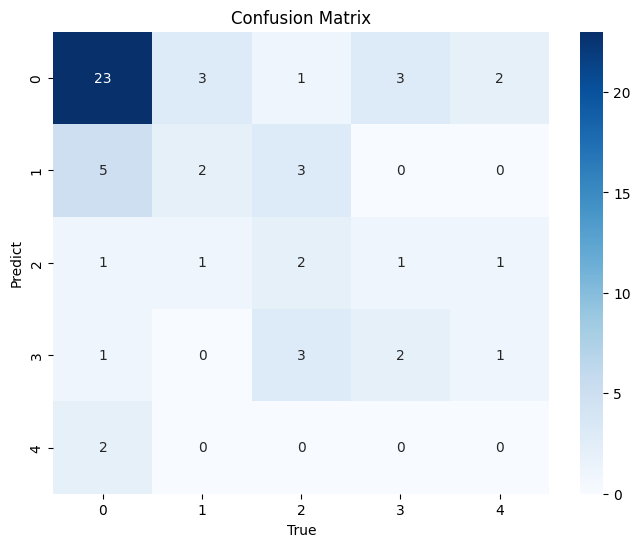

In [397]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversample

## Naive Bayes

In [398]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [399]:
nb_model = GaussianNB()

# Model training
nb_model.fit(X_train_oversample, y_train_oversample)

# Predict Output
y_pred_nb = nb_model.predict(X_test_oversample)

In [400]:
#Evaluate the Naive Bayes model
print("Naive Bayes Model :")
accuracy_nb_ros =  round(accuracy_score(y_test_oversample,y_pred_nb),3)
print("Accuracy : ", accuracy_nb_ros)
print("Classification Report : ")
print(classification_report(y_test_oversample, y_pred_nb))

Naive Bayes Model :
Accuracy :  0.554
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76        32
         1.0       0.45      0.32      0.38        31
         2.0       0.45      0.45      0.45        31
         3.0       0.62      0.25      0.36        32
         4.0       0.53      0.94      0.67        31

    accuracy                           0.55       157
   macro avg       0.55      0.55      0.52       157
weighted avg       0.56      0.55      0.53       157



In [401]:
evaluation(y_test_oversample, y_pred_nb)

{'accuracy': 0.554, 'recall': 0.554, 'F1 score': 0.525, 'precision score': 0.556}


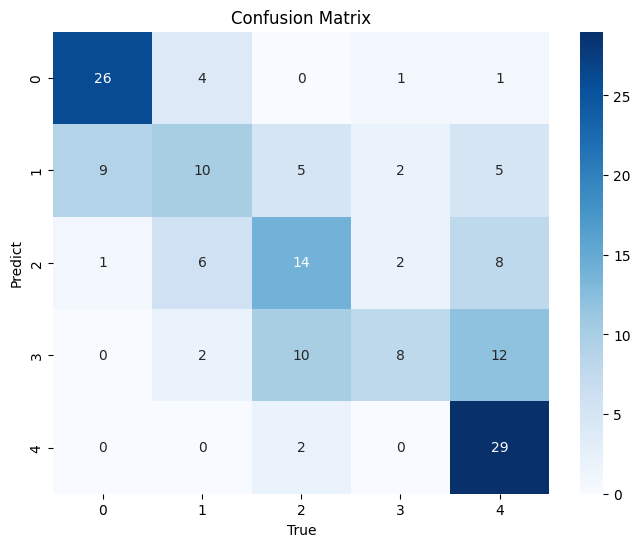

In [402]:
cm = confusion_matrix(y_test_oversample, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Decision Tree

In [403]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [404]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model.fit(X_train_oversample,y_train_oversample)

#Predict the response for test dataset
y_pred_dt = dt_model.predict(X_test_oversample)

In [405]:
#Evaluate the Decision Tree model
print("Decision Tree Model :")
accuracy_dt_ros =  round(accuracy_score(y_test_oversample,y_pred_dt),3)
print("Accuracy : ", accuracy_dt_ros)
print("Classification Report : ")
print(classification_report(y_test_oversample, y_pred_dt))

Decision Tree Model :
Accuracy :  0.924
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79        32
         1.0       0.82      1.00      0.90        31
         2.0       0.97      0.90      0.93        31
         3.0       0.97      1.00      0.98        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.92       157
   macro avg       0.93      0.92      0.92       157
weighted avg       0.93      0.92      0.92       157



In [406]:
evaluation(y_test_oversample, y_pred_dt)

{'accuracy': 0.924, 'recall': 0.924, 'F1 score': 0.921, 'precision score': 0.927}


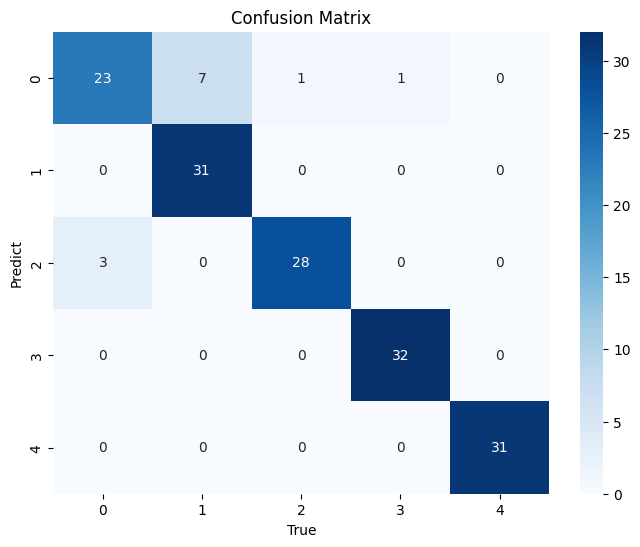

In [407]:
cm = confusion_matrix(y_test_oversample, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversample + Normalization

## Naive Bayes

In [408]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [409]:
nb_model = GaussianNB()

# Model training
nb_model.fit(X_train_normal, y_train_normal)

# Predict Output
y_pred_nb = nb_model.predict(X_test_normal)

In [410]:
#Evaluate the Naive Bayes model
print("Naive Bayes Model :")
accuracy_nb_ros_normal =  round(accuracy_score(y_test_normal,y_pred_nb),3)
print("Accuracy : ", accuracy_nb_ros_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_nb))

Naive Bayes Model :
Accuracy :  0.554
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76        32
         1.0       0.45      0.32      0.38        31
         2.0       0.45      0.45      0.45        31
         3.0       0.62      0.25      0.36        32
         4.0       0.53      0.94      0.67        31

    accuracy                           0.55       157
   macro avg       0.55      0.55      0.52       157
weighted avg       0.56      0.55      0.53       157



In [411]:
evaluation(y_test_normal, y_pred_nb)

{'accuracy': 0.554, 'recall': 0.554, 'F1 score': 0.525, 'precision score': 0.556}


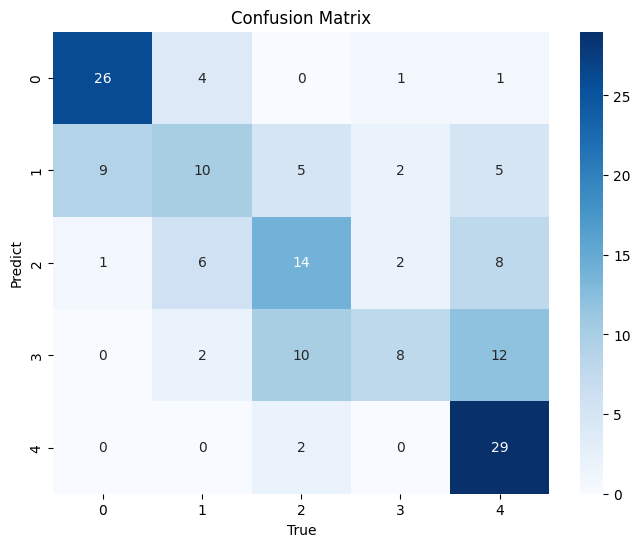

In [412]:
cm = confusion_matrix(y_test_normal, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Decision Tree

In [413]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [414]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model.fit(X_train_normal,y_train_normal)

#Predict the response for test dataset
y_pred_dt = dt_model.predict(X_test_normal)

In [415]:
#Evaluate the Decision Tree model
print("Decision Tree Model :")
accuracy_dt_ros_normal =  round(accuracy_score(y_test_normal,y_pred_dt),3)
print("Accuracy : ", accuracy_dt_ros_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_dt))

Decision Tree Model :
Accuracy :  0.93
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81        32
         1.0       0.86      1.00      0.93        31
         2.0       0.97      0.90      0.93        31
         3.0       0.94      1.00      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [416]:
evaluation(y_test_normal, y_pred_dt)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.928, 'precision score': 0.931}


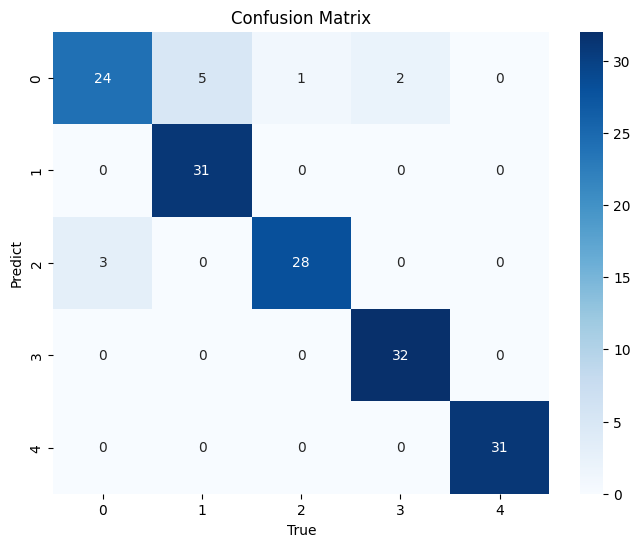

In [417]:
cm = confusion_matrix(y_test_normal, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# 8) Evaluasi

Evaluasi data sekaligus membandingkan antar algoritma guna mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik

## Comparison Data Raw

In [418]:
import matplotlib.pyplot as plt

In [419]:
model_comp1 = pd.DataFrame({
    'Model' : ['Naive Bayes', 'Decision Tre'],
    'Accuracy' : [accuracy_nb*100, accuracy_dt*100]
})

model_comp1.head()

,Model,Accuracy
0,Naive Bayes,50.9
1,Decision Tre,50.9


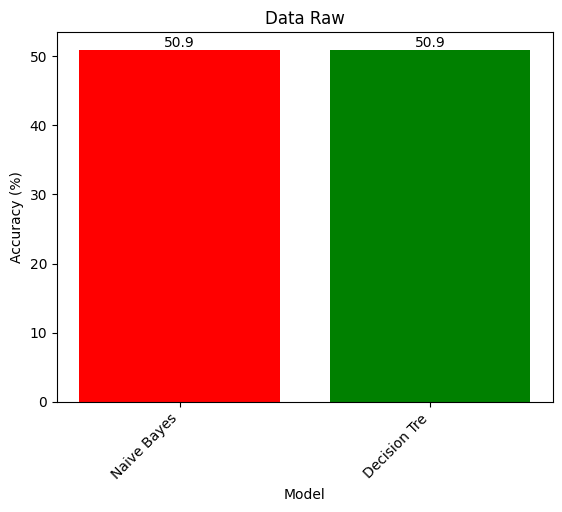

In [420]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Data Raw')
plt.xticks(rotation=45, ha='right') # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## Comparison Oversample

In [421]:
model_comp2 = pd.DataFrame({
    'Model' : ['Naive Bayes', 'Decision Tre'],
    'Accuracy' : [accuracy_nb_ros*100, accuracy_dt_ros*100]
})

model_comp2.head()

,Model,Accuracy
0,Naive Bayes,55.4
1,Decision Tre,92.4


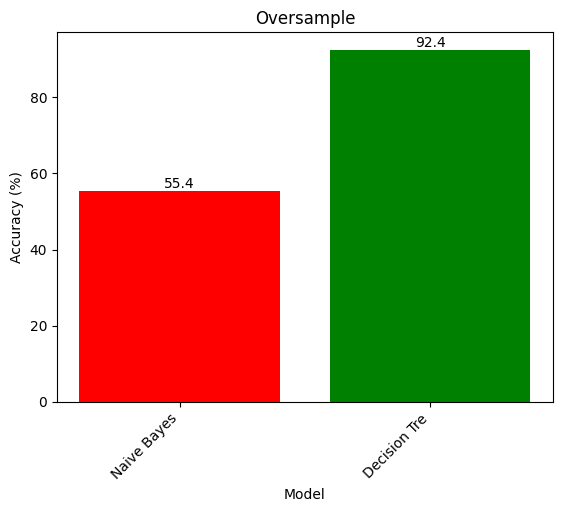

In [422]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## Comparison Oversample + Normalization

In [423]:
model_comp3 = pd.DataFrame({
    'Model' : ['Naive Bayes', 'Decision Tre'],
    'Accuracy' : [accuracy_nb_ros_normal*100, accuracy_dt_ros_normal*100]
})

model_comp3.head()

,Model,Accuracy
0,Naive Bayes,55.4
1,Decision Tre,93.0


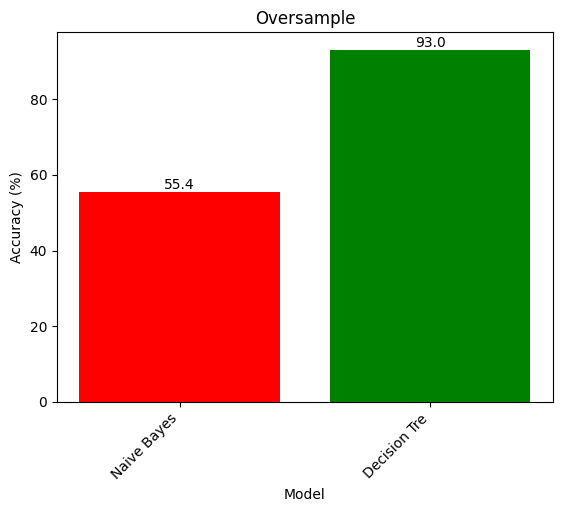

In [424]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [427]:
# Data Frame
model_compBest = pd.DataFrame({
    'Model' : ['Decision Tree Raw', 'Decision Tree Oversample','Decision Tree Oversample + Normalization'],
    'Accuracy' : [accuracy_dt*100, accuracy_dt_ros*100, accuracy_dt_ros_normal*100]
})

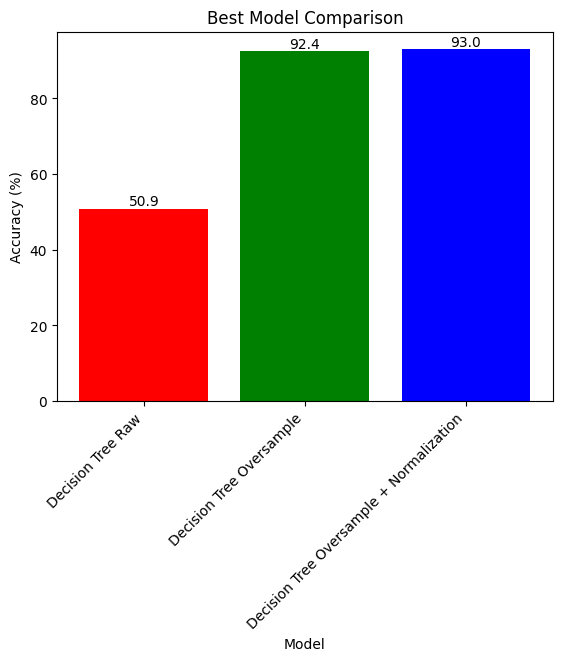

In [428]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# Kesimpulan

Berdasarkan penelitian di atas dimana telah melakukan pemodelan dengan algoritma Naive Bayes dan Decision Tree dengan berbagai penanganan data. Dapat disimpulkan bahwa klasifikasi menggunakan : <br> <br>

Data Raw pada model :


1.   Naive Bayes menghasilkan akurasi 50.9%
2.   Decision Tree menghasilkan akurasi 50.9% <br>

Data Oversample RandomOverSampler :


1.   Naive Bayes menghasilkan akurasi 55.4%
2.   Decision Tree menghasilkan akurasi 92.4% <br>

Data Oversample RandomOverSampler + Normalization :


1.   Naive Bayes menghasilkan akurasi 55.4%
2.   **Decision Tree menghasilkan akurasi 93%** <br>

**Oleh karena itu, dalam penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode Random Oversampling RandomOverSampler Normalisasi data.**<br>

**Metode tersebut memberikan hasil yang signifikan dalam meingkatkan akurasi model klasifikasi khususnya pada model Decision Tree.**<br>

Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi.
<br>

Namun, hal itu tidak terjadi pada model Naive Bayes yang stuck di 55.4% walaupun sudah dinormalisasi.
